In [1]:
import pandas as pd
import seaborn as sns
from joblib import load
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from termcolor import colored

In [2]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')
X_train.head()

,Belts,PersonalInjury,PropertyDamage,CommercialLicense,CommercialVehicle,ContributedToAccident,Gender,VehicleType_'02 - Automobile',VehicleType_'03 - Station Wagon',VehicleType_'04 - Limousine',...,Model_VAN,Model_VERSA,Model_VN,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_OTHER,Race_WHITE,ArrestType_Marked Patrol,ArrestType_Unmarked Patrol
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [3]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['Kazna', 'Oprema', 'Upozorenje'], index=['0', '1', '2']))
    print("---------------------------------------------------------------------------------")

In [4]:
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['Kazna', 'Oprema', 'Upozorenje'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")

## Stablo odlučivanja

In [5]:
dtc = DecisionTreeClassifier(max_depth=30, criterion='entropy')

In [6]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [7]:
report(dtc, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.62      0.67     23810
           1       0.65      0.88      0.75     23810
           2       0.74      0.58      0.65     23810

    accuracy                           0.70     71430
   macro avg       0.71      0.70      0.69     71430
weighted avg       0.71      0.70      0.69     71430

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  14703    5682        3425
1   1326   21049        1435
2   4278    5613       13919
---------------------------------------------------------------------------------


In [8]:
report(dtc, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.43      0.47      9637
           1       0.07      0.38      0.12      1049
           2       0.55      0.39      0.46     10205

    accuracy                           0.41     20891
   macro avg       0.38      0.40      0.35     20891
weighted avg       0.51      0.41      0.45     20891

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0   4171    2496        2970
1    311     401         337
2   3474    2721        4010
---------------------------------------------------------------------------------


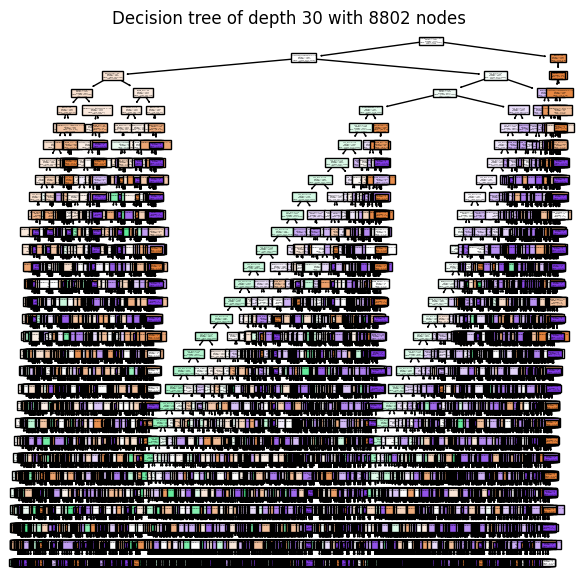

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion entropy
max_depth 30
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [9]:
feature_names = X_train.columns
plot_decision_tree(dtc, feature_names)

Takođe, možemo prikazati i koji atributi su bili od najvećeg značaja prilikom formiranje stabla odlučivanja.

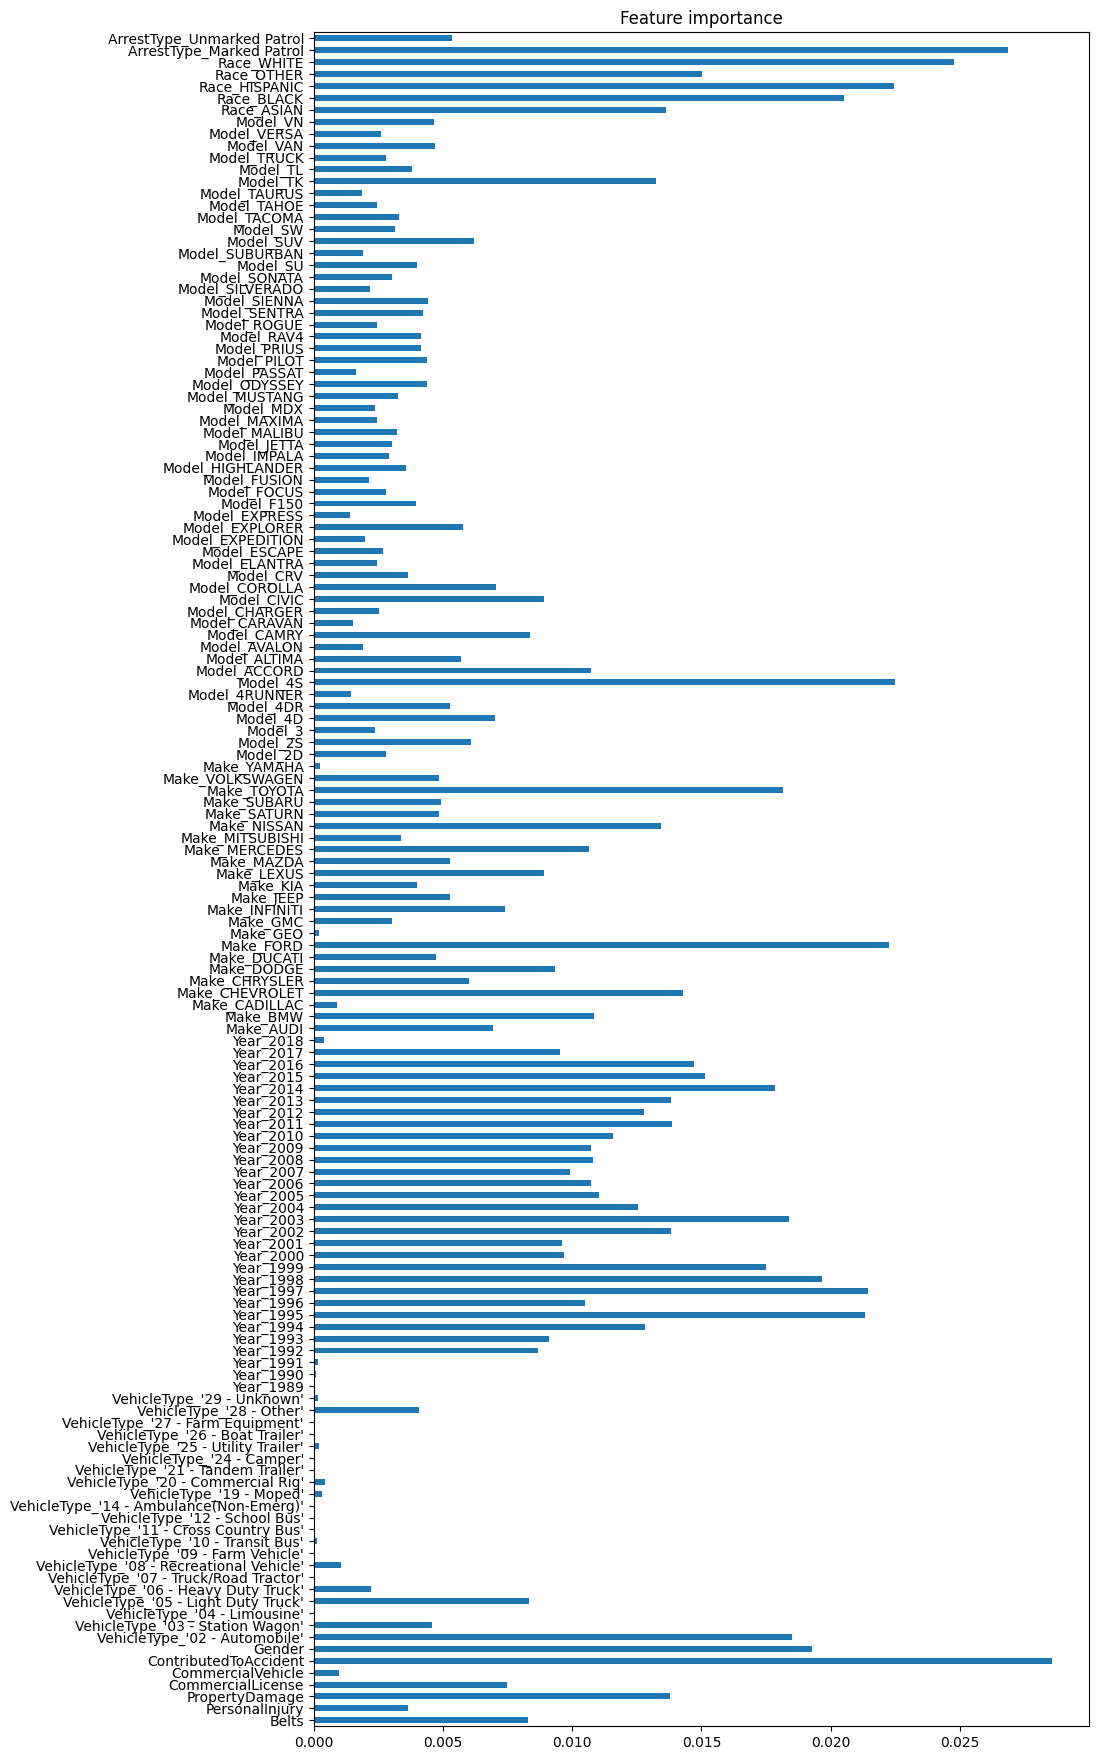

In [10]:
plt.figure(figsize=(10, 22))
pd.Series(dtc.feature_importances_, index=X_train.columns).plot.barh()
plt.title("Feature importance")
plt.show()

Pokušaćemo da unapredimo model promenom hiper-parametara.

# Podešavanje hiper-parametara

## GridSearchCV

U mapi čuvamo informaciju o imenima i vrednostima parametara koje želimo da ispitamo.

In [11]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
         }

In [12]:
estimator_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3)

In [13]:
estimator_dtc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                                       60, 65, 70]})

Možemo pogledati koja je najbolja kombinacija parametara.

In [14]:
estimator_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 70}

Kao i najbolji score.

In [15]:
estimator_dtc.best_score_

0.6087078258434832

In [16]:
report(estimator_dtc.best_estimator_, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     23810
           1       0.94      0.96      0.95     23810
           2       0.91      0.83      0.87     23810

    accuracy                           0.89     71430
   macro avg       0.90      0.89      0.89     71430
weighted avg       0.90      0.89      0.89     71430

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  21308     827        1675
1    588   22875         347
2   3400     687       19723
---------------------------------------------------------------------------------


In [17]:
report(estimator_dtc.best_estimator_, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      9637
           1       0.06      0.18      0.09      1049
           2       0.54      0.44      0.49     10205

    accuracy                           0.46     20891
   macro avg       0.37      0.38      0.36     20891
weighted avg       0.50      0.46      0.48     20891

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0   4901    1272        3464
1    461     187         401
2   4220    1451        4534
---------------------------------------------------------------------------------


Takođe, možemo detaljnije pogledati i rezultate cross validacije.

In [18]:
estimator_dtc.cv_results_

{'mean_fit_time': array([0.37100188, 0.50765967, 0.66489212, 0.77427363, 0.87599675,
        0.88995274, 0.90723634, 0.94514712, 0.94184637, 1.04388126,
        1.02291552, 1.13929105, 1.00564281, 0.3796734 , 0.5199604 ,
        0.64029527, 0.78558024, 0.92021314, 0.91024097, 0.9414854 ,
        0.96276379, 1.06249666, 1.14261746, 1.08910116, 1.09209371,
        1.06482395]),
 'std_fit_time': array([0.00533281, 0.00845382, 0.03449303, 0.03141221, 0.06917132,
        0.05415828, 0.02754246, 0.00283801, 0.01502129, 0.0359245 ,
        0.0559116 , 0.03743321, 0.00772533, 0.00871551, 0.01155628,
        0.01199904, 0.04538615, 0.01575009, 0.00416396, 0.03497947,
        0.02731596, 0.03244838, 0.00756816, 0.04567882, 0.05380814,
        0.02234726]),
 'mean_score_time': array([0.01961025, 0.02061621, 0.02027774, 0.02159087, 0.02193364,
        0.02193586, 0.02228824, 0.02259183, 0.02258309, 0.02526506,
        0.02593875, 0.0246044 , 0.02326703, 0.02026463, 0.02159468,
        0.02194277, 

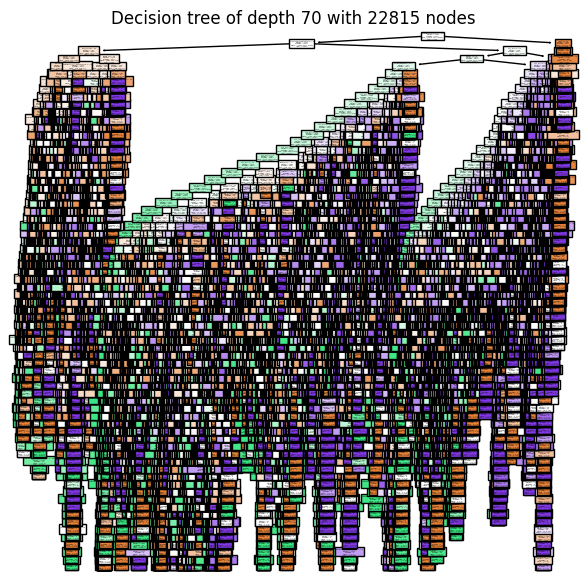

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion entropy
max_depth 70
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [19]:
plot_decision_tree(estimator_dtc.best_estimator_, feature_names)

## Slučajne šume

In [20]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=23)
random_forest.fit(X_train, y_train)

report(random_forest, X_train, y_train)

report(random_forest, X_test, y_test, "test")

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     23810
           1       0.95      0.96      0.96     23810
           2       0.87      0.88      0.87     23810

    accuracy                           0.90     71430
   macro avg       0.90      0.90      0.90     71430
weighted avg       0.90      0.90      0.90     71430

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  20432     769        2609
1    414   22938         458
2   2426     510       20874
---------------------------------------------------------------------------------
Classification report for model Ran

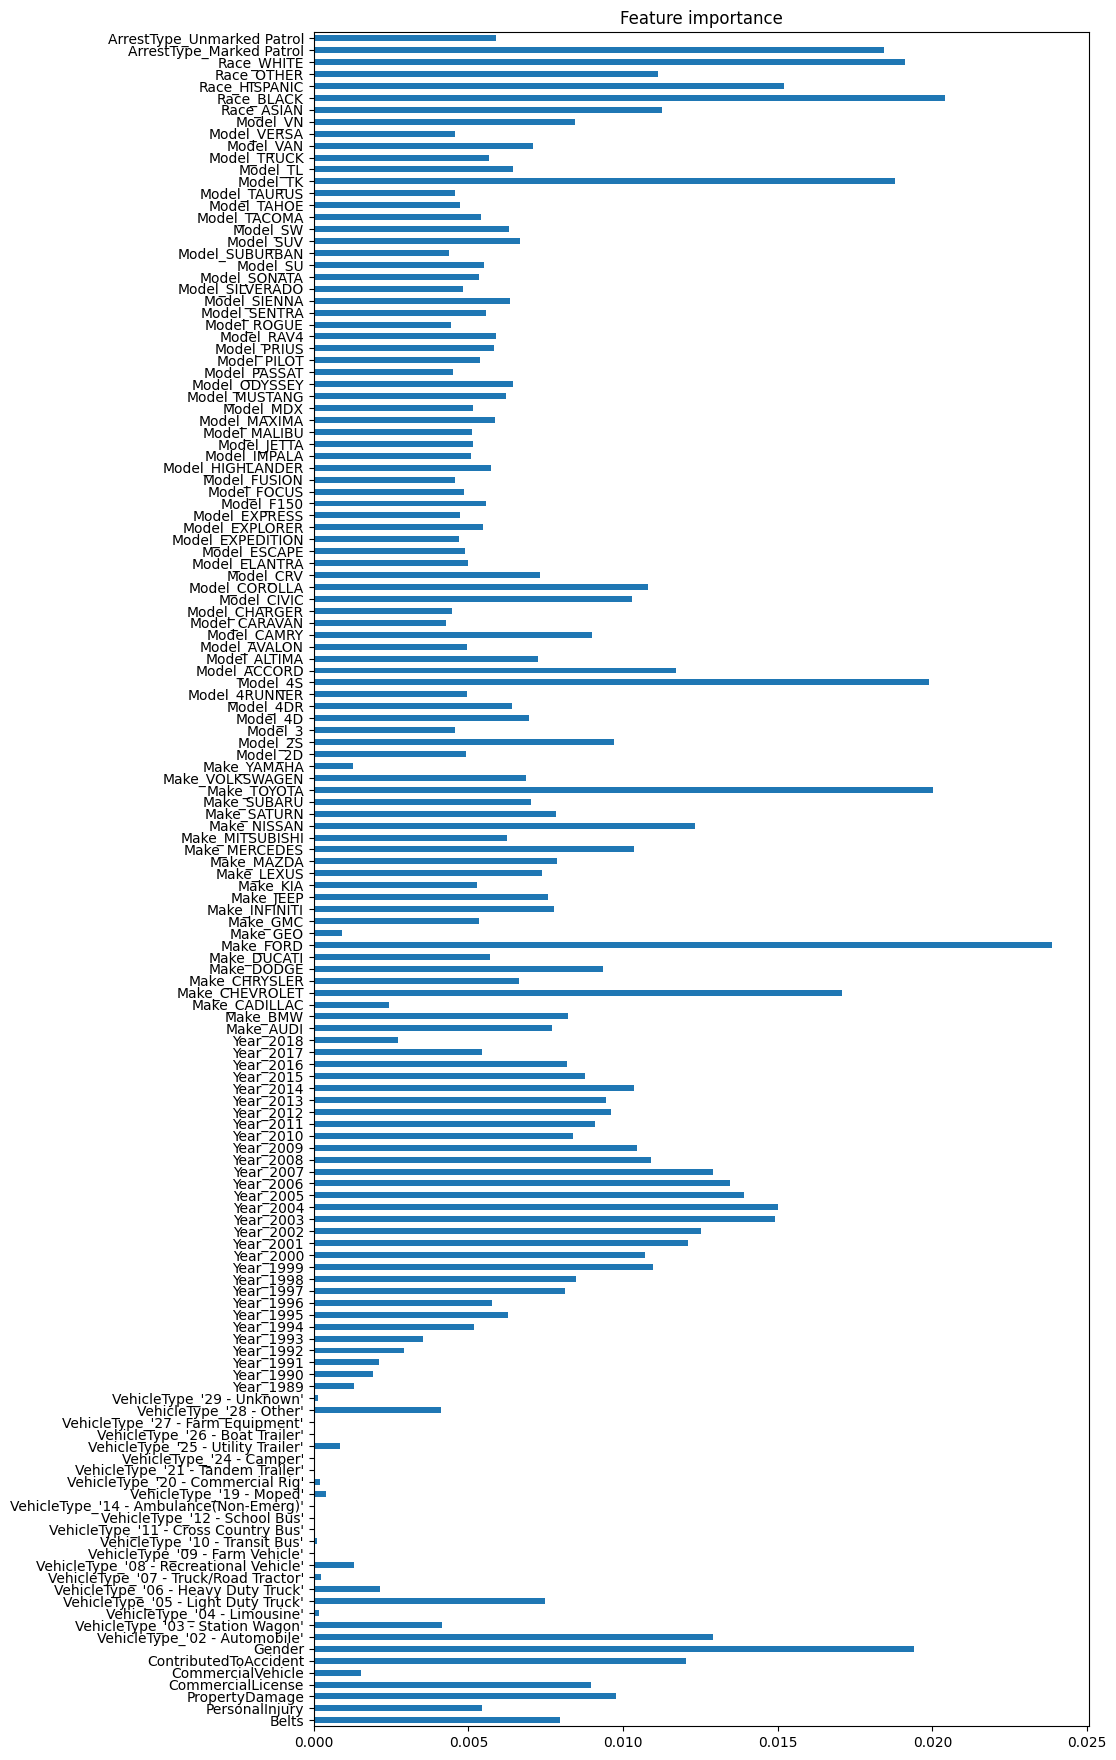

In [21]:
plt.figure(figsize=(10, 22))
pd.Series(random_forest.feature_importances_, index=X_train.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [22]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 150, 200]
}

In [23]:
estimator_rfc = GridSearchCV(RandomForestClassifier(random_state=24), param_grid=params, cv=3)

In [24]:
estimator_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 150, 200]})

In [25]:
estimator_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

In [26]:
estimator_rfc.best_score_

0.6269214615707686

In [27]:
report(estimator_rfc.best_estimator_, X_train, y_train)

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     23810
           1       0.95      0.96      0.96     23810
           2       0.87      0.88      0.87     23810

    accuracy                           0.90     71430
   macro avg       0.90      0.90      0.90     71430
weighted avg       0.90      0.90      0.90     71430

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0  20366     778        2666
1    378   22950         482
2   2372     510       20928
---------------------------------------------------------------------------------


In [28]:
report(estimator_rfc.best_estimator_, X_test, y_test, "test")

Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.51      0.52      9637
           1       0.08      0.19      0.11      1049
           2       0.55      0.50      0.52     10205

    accuracy                           0.48     20891
   macro avg       0.39      0.40      0.38     20891
weighted avg       0.52      0.48      0.50     20891

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on test data 
---------------------------------------------------------------------------------
   Kazna  Oprema  Upozorenje
0   4870    1165        3602
1    387     204         458
2   3813    1338        5054
---------------------------------------------------------------------------------


In [29]:
estimator_rfc.cv_results_

{'mean_fit_time': array([12.73231872, 19.23858054, 25.19442129, 13.00789134, 19.46098741,
        28.46660765, 17.58854469, 24.56413428, 35.85892892]),
 'std_fit_time': array([0.12043491, 0.4912822 , 0.32862731, 0.13191037, 0.21704529,
        3.72783231, 0.35635769, 1.21215565, 0.37663477]),
 'mean_score_time': array([0.7842292 , 1.19246578, 1.55549757, 0.79188267, 1.17185553,
        1.8033816 , 1.04034392, 1.46786237, 2.1444993 ]),
 'std_score_time': array([0.00862481, 0.03867487, 0.01477892, 0.0021392 , 0.01128361,
        0.24731444, 0.0358029 , 0.11156041, 0.01187143]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'log_loss', 'log_loss', 'log_loss'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 150, 200, 100, 150, 200, 100, 150, 200],
              mask=[

# Poređenje dobijenih modela

Koristićemo ROC krivu, ali moramo izmeniti standardnu metodu koja se koristi za binarnu klasifikaciju.

Koristićemo OvR (One vs Rest - Jedan naspram Ostalih) metodu za evaluaciju modela. Tj. merićemo razdvojenost svake klase zasebno od svih ostalih klasa.

In [30]:
classes = dtc.classes_
classes

array([0, 1, 2], dtype=int64)

In [31]:
def calculate_tpr_fpr(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    tpr =  TP/(TP + FN)
    fpr = 1 - TN/(TN+FP)
    
    return tpr, fpr

def get_all_roc_coordinates(y_real, y_proba):
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

## Stablo odlučivanja

Tačnost: 0.4108
Histogrami i ROC krive:


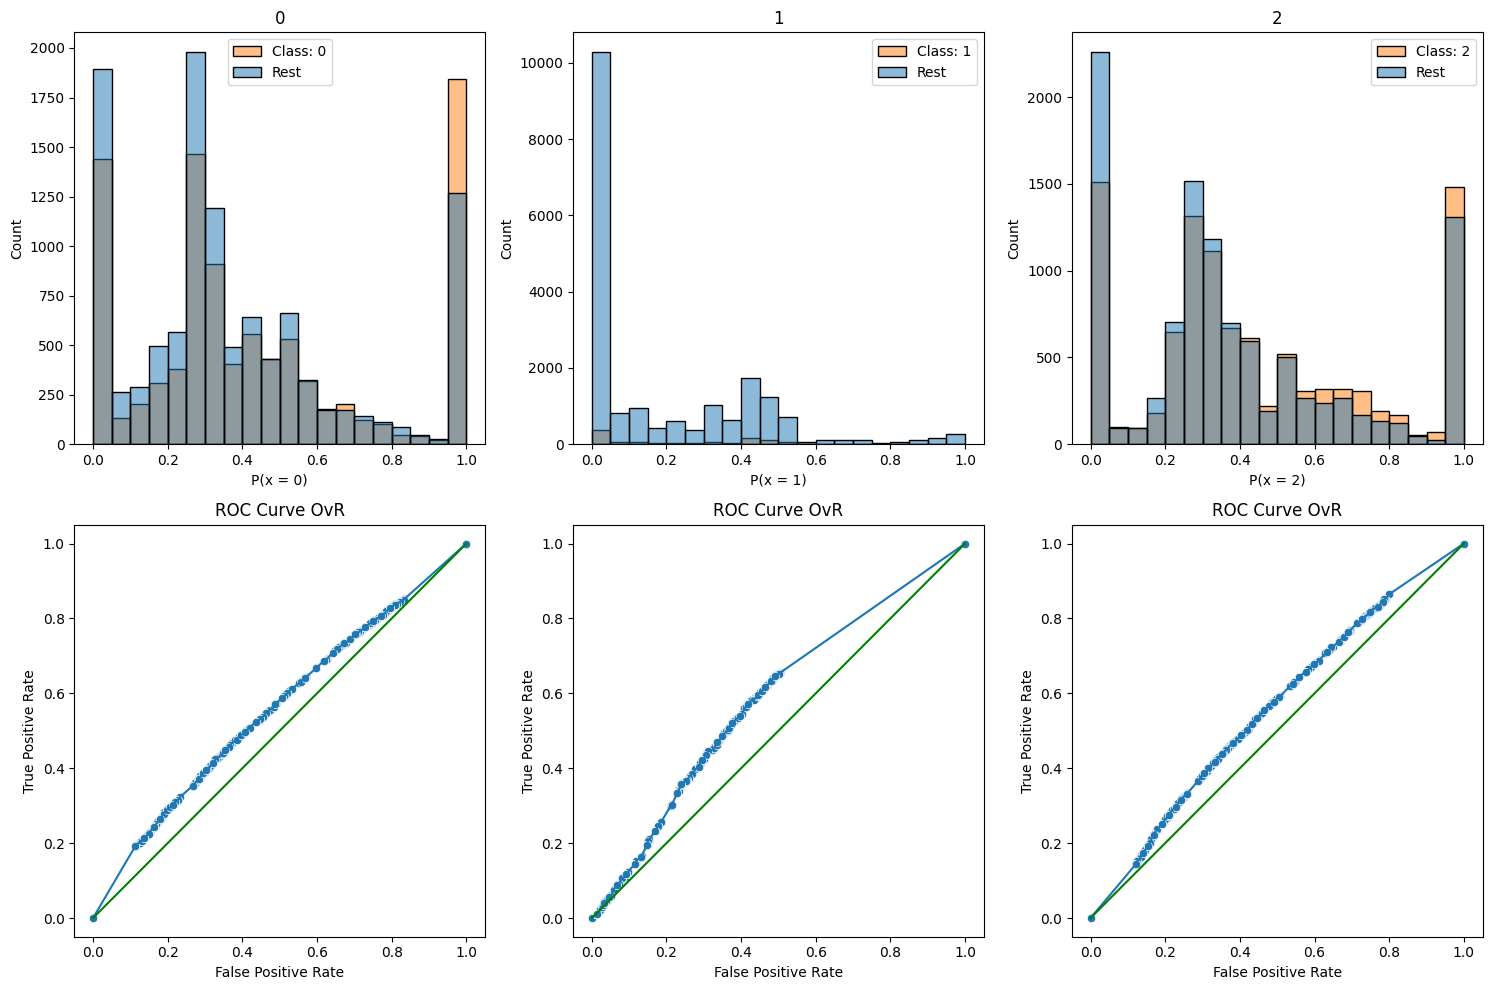

In [32]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}
    
y_pred = dtc.predict(X_test)
y_proba = dtc.predict_proba(X_test)
print("Tačnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]

    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

## GridSearchCV

tacnost: 0.4606
Histogrami i ROC krive:


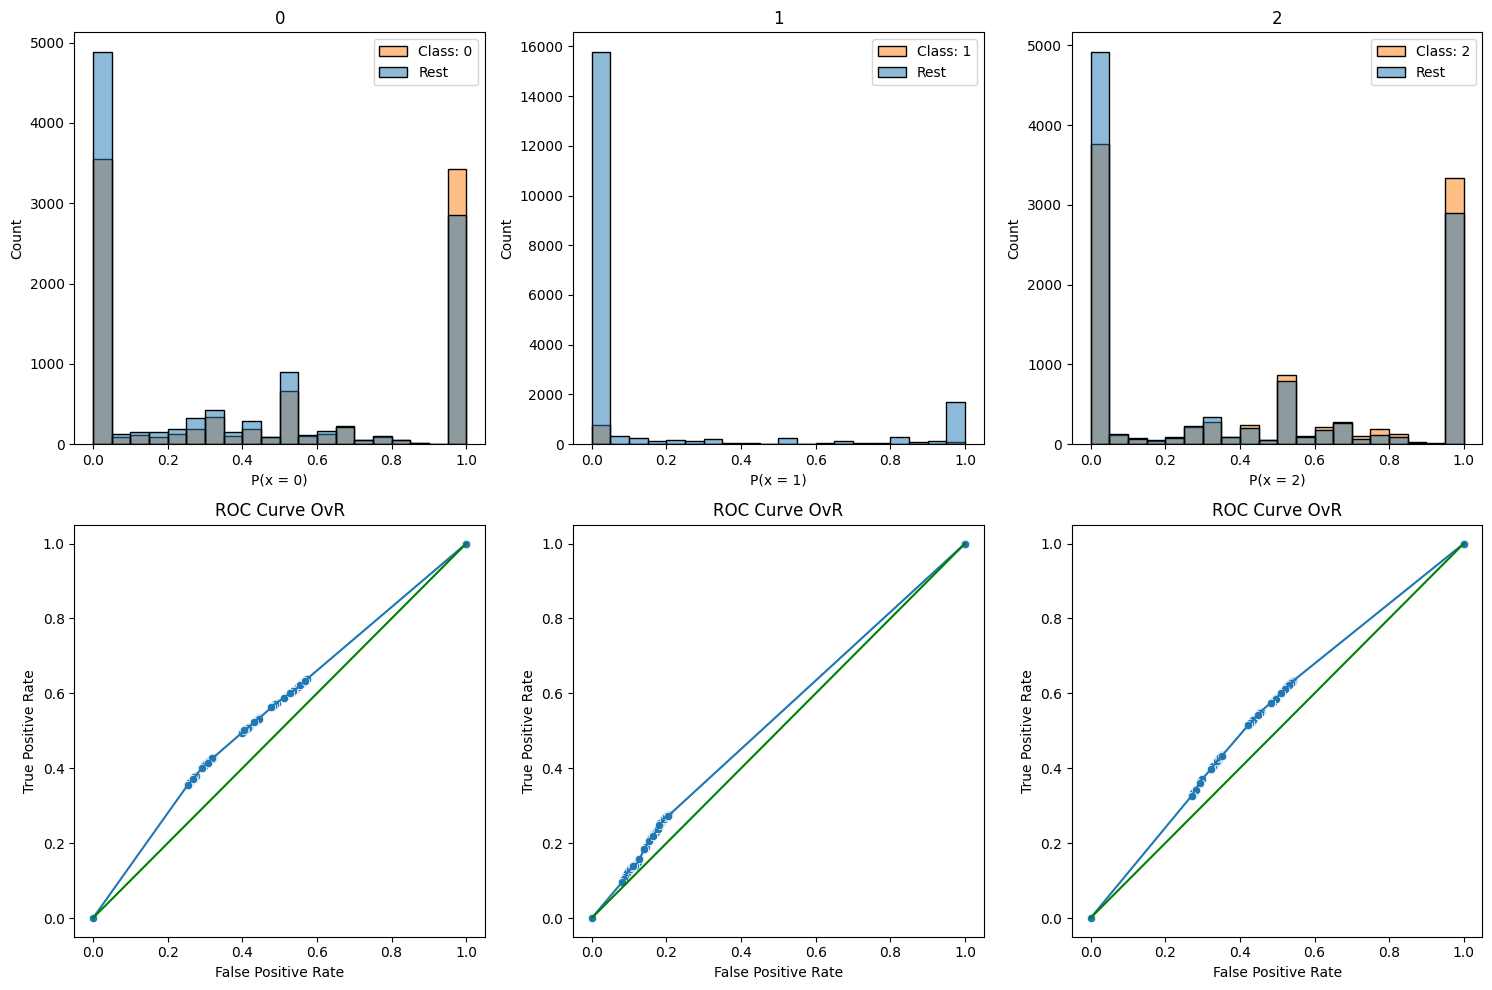

In [33]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = estimator_dtc.best_estimator_.predict(X_test)
y_proba = estimator_dtc.best_estimator_.predict_proba(X_test)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

## Slučajne šume

tacnost: 0.4825
Histogrami i ROC krive:


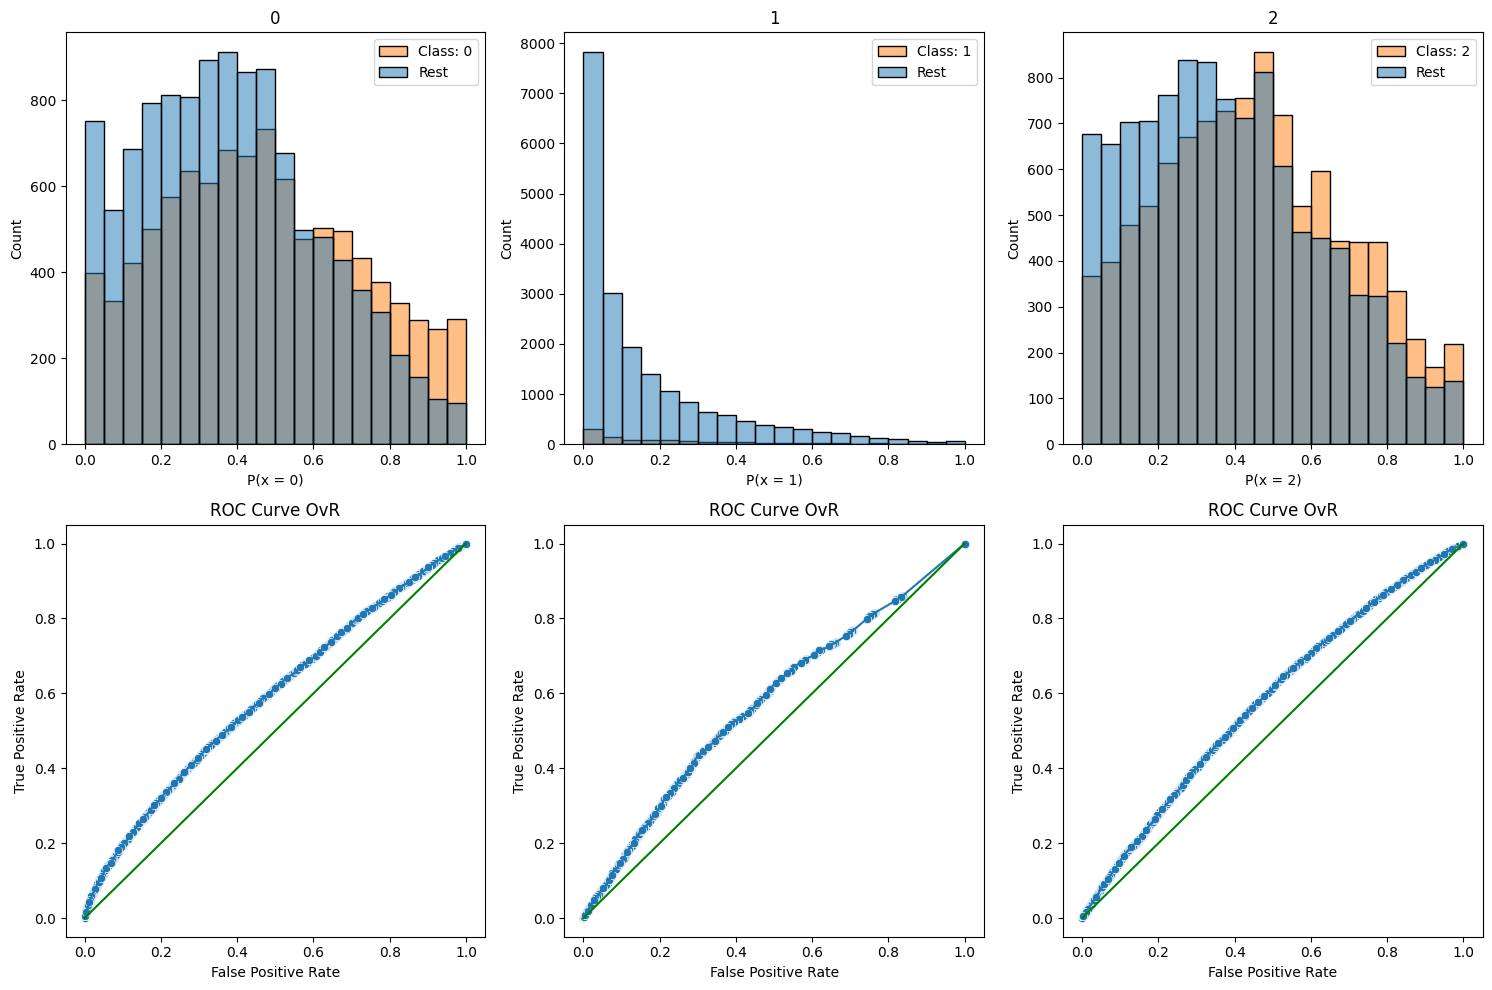

In [34]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = random_forest.predict(X_test)
y_proba = random_forest.predict_proba(X_test)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

## Slučajne šume - GridSearchCV

tacnost: 0.4848
Histogrami i ROC krive:


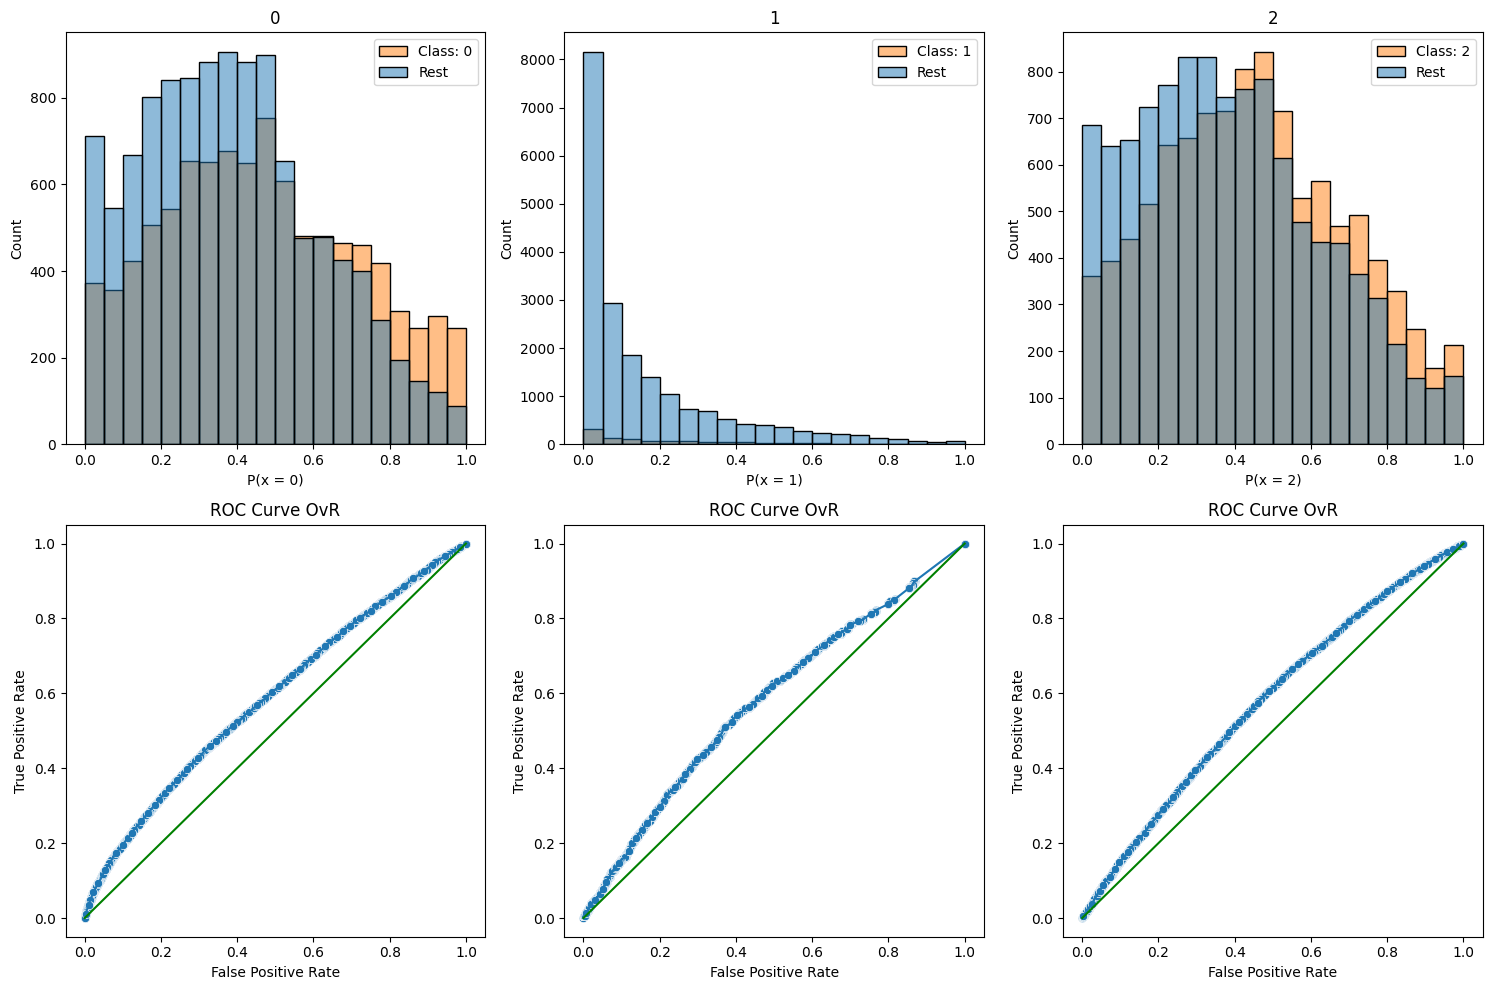

In [35]:
plt.figure(figsize = (25, 10))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

y_pred = estimator_rfc.best_estimator_.predict(X_test)
y_proba = estimator_rfc.best_estimator_.predict_proba(X_test)
print("tacnost: %.4f" % accuracy_score(y_test, y_pred))
print("Histogrami i ROC krive:")

for i in range(len(classes)):
    c = classes[i]
    
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

    ax_bottom = plt.subplot(2, 5, i+6)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()